In [1]:
线性可分的SVM模型函数说明
LinearSVC(tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, max_iter=1000)
tol：用于指定SVM模型迭代的收敛条件，默认为0.0001
C：用于指定目标函数中松弛因子的惩罚系数值，默认为1
fit_intercept：bool类型参数，是否拟合线性“超平面”的截距项，默认为True
intercept_scaling：当参数fit_intercept为True时，该参数有效，通过给参数传递一个浮点值，就相当于在自变量X矩阵中添加一常数列，默认该参数值为1
class_weight：用于指定因变量类别的权重，如果为字典，则通过字典的形式{class_label:weight}传递每个类别的权重；
              如果为字符串'balanced'，则每个分类的权重与实际样本中的比例成反比，当各分类存在严重不平衡时，设置为'balanced'会比较好；
              如果为None，则表示每个分类的权重相等
max_iter：指定模型求解过程中的最大迭代次数，默认为1000

In [ ]:
非线性可分的SVM模型函数说明
SVC(C=1.0, kernel=‘rbf’, degree=3, gamma=‘auto’, coef0=0.0, tol=0.001, class_weight=None, verbose=False, max_iter=-1, random_state=None)
C：用于指定目标函数中松弛因子的惩罚系数值，默认为1
kernel：用于指定SVM模型的核函数，该参数如果为'linear'，就表示线性核函数；
        如果为'poly'，就表示多项式核函数，核函数中的r和p值分别使用degree参数和gamma参数指定；
        如果为'rbf'，表示径向基核函数，核函数中的r参数值仍然通过gamma参数指定；
        如果为'sigmoid'，表示Sigmoid核函数，核函数中的r参数值需要通过gamma参数指定；
        如果为'precomputed'，表示计算一个核矩阵
degree：用于指定多项式核函数中的p参数值
gamma：用于指定多项式核函数或径向基核函数或Sigmoid核函数中的r参数值
coef0：用于指定多项式核函数或Sigmoid核函数中的r参数值
tol：用于指定SVM模型迭代的收敛条件，默认为0.001
class_weight：用于指定因变量类别的权重，如果为字典，则通过字典的形式{class_label:weight}传递每个类别的权重；
              如果为字符串'balanced'，则每个分类的权重与实际样本中的比例成反比，当各分类存在严重不平衡时，设置为'balanced'会比较好；
              如果为None，则表示每个分类的权重相等
max_iter：指定模型求解过程中的最大迭代次数，默认为-1，表示不限制迭代次数

In [1]:
# 导入第三方模块
from sklearn import svm
import pandas as pd
from sklearn import model_selection
from sklearn import metrics

In [2]:
# 读取外部数据
letters = pd.read_csv(r'letterdata.csv')
# 数据前5行
letters.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
# 将数据拆分为训练集和测试集
predictors = letters.columns[1:]
X_train,X_test,y_train,y_test = model_selection.train_test_split(letters[predictors], letters.letter, 
                                                                 test_size = 0.25, random_state = 1234)

In [5]:
# 选择线性可分SVM模型
linear_svc = svm.LinearSVC()
# 模型在训练数据集上的拟合
linear_svc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [6]:
# 模型在测试集上的预测
pred_linear_svc = linear_svc.predict(X_test)
# 模型的预测准确率
metrics.accuracy_score(y_test, pred_linear_svc)

0.6654

In [7]:
# 选择非线性SVM模型
nolinear_svc = svm.SVC(kernel='rbf')
# 模型在训练数据集上的拟合
nolinear_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# 模型在测试集上的预测
pred_svc = nolinear_svc.predict(X_test)
# 模型的预测准确率
metrics.accuracy_score(y_test,pred_svc)
# 经过5重交叉验证后，发现最佳的惩罚系数C为5，最佳的核函数为径向基核函数。
# 相比于线性可分SVM模型来说，基于核技术的SVM表现了极佳的效果，模型在训练数据集上的平均准确率高达97.34%，
# 而且其在测试数据集的预测准确率也接近98%，说明利用非线性可分SVM模型拟合及预测手体字母数据集是非常理想的。

0.9734

In [9]:
# 读取外部数据
forestfires = pd.read_csv(r'forestfires.csv')
# 数据前5行
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
# 删除day变量
forestfires.drop('day',axis = 1, inplace = True)
# 将月份作数值化处理
forestfires.month = pd.factorize(forestfires.month)[0]
# 预览数据前5行
forestfires.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,1,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


C:\Users\WGW\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


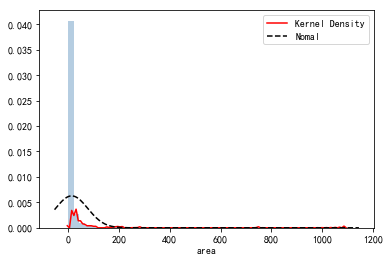

In [12]:
# 导入第三方模块
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
# 绘制森林烧毁面积的直方图
sns.distplot(forestfires.area, bins = 50, kde = True, fit = norm, hist_kws = {'color':'steelblue'}, 
             kde_kws = {'color':'red', 'label':'Kernel Density'}, 
             fit_kws = {'color':'black','label':'Nomal', 'linestyle':'--'})
# 显示图例
plt.legend()
# 显示图形
plt.show()

In [13]:
# 导入第三方模块
from sklearn import preprocessing
import numpy as np
from sklearn import neighbors
# 对area变量作对数变换
y = np.log1p(forestfires.area)
# 将X变量作标准化处理
predictors = forestfires.columns[:-1]
X = preprocessing.scale(forestfires[predictors])

In [14]:
# 将数据拆分为训练集和测试集
X_train,X_test,y_train,y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 1234)

In [15]:
# 构建默认参数的SVM回归模型
svr = svm.SVR()
# 模型在训练数据集上的拟合
svr.fit(X_train,y_train)
# 模型在测试上的预测
pred_svr = svr.predict(X_test)
# 计算模型的MSE
metrics.mean_squared_error(y_test,pred_svr)

1.925863595333521

In [16]:
# 使用网格搜索法，选择SVM回归中的最佳C值、epsilon值和gamma值
epsilon = np.arange(0.1,1.5,0.2)
C= np.arange(100,1000,200)
gamma = np.arange(0.001,0.01,0.002)
parameters = {'epsilon':epsilon,'C':C,'gamma':gamma}
grid_svr = model_selection.GridSearchCV(estimator = svm.SVR(max_iter=10000),param_grid =parameters,
                                        scoring='neg_mean_squared_error',cv=5,verbose =1, n_jobs=2)
# 模型在训练数据集上的拟合
grid_svr.fit(X_train,y_train)
# 返回交叉验证后的最佳参数值
print(grid_svr.best_params_, grid_svr.best_score_)

Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=2)]: Done 348 tasks      | elapsed:    7.2s


{'C': 300, 'epsilon': 1.1000000000000003, 'gamma': 0.001} -1.9940579497706303


[Parallel(n_jobs=2)]: Done 875 out of 875 | elapsed:   19.1s finished


In [18]:
# 模型在测试集上的预测
pred_grid_svr = grid_svr.predict(X_test)
# 计算模型在测试集上的MSE值
metrics.mean_squared_error(y_test,pred_grid_svr)

1.7455012238826595